In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# 读取CSV文件
df = pd.read_csv('metric_results_allsess.csv')

# 显示前几行数据以确认读取正确
print(df.head())

# 检查 'value' 列的数据类型
print(df['value'].dtype)

# 将 'value' 列转换为数值类型
df['value'] = pd.to_numeric(df['value'], errors='coerce')

# 定义要统计的 metric_names
metrics_to_sum = [
    'smsp__sass_thread_inst_executed_op_ffma_pred_on.sum',
    'smsp__sass_thread_inst_executed_op_fadd_pred_on.sum',
    'smsp__sass_thread_inst_executed_op_fmul_pred_on.sum',
    'smsp__sass_thread_inst_executed_op_fp32_pred_on.sum'
]

# 计算每个 metric_name 的 value 列的总和
results = {}
for metric in metrics_to_sum:
    filtered_df = df[df['metric_name'] == metric]
    total_sum = filtered_df['value'].sum()
    results[metric] = total_sum

# 打印结果
for metric, total_sum in results.items():
    print(f'Total sum of values for metric_name "{metric}": {total_sum}')

total_sum = df['value'].sum()
print(f'Total sum of values: {total_sum}')

# 计算复合指标
composite_metric_value = (
    results['smsp__sass_thread_inst_executed_op_ffma_pred_on.sum'] * 2 +
    results['smsp__sass_thread_inst_executed_op_fadd_pred_on.sum'] +
    results['smsp__sass_thread_inst_executed_op_fmul_pred_on.sum']
)

# 打印复合指标的结果
print(f'Composite metric (2 * ffma + fadd + fmul): {composite_metric_value}')

In [ ]:
# 计算并添加 ratio 列
df['ratio'] = df.apply(lambda row: (row['value'] / results[row['metric_name']]) if results[row['metric_name']] != 0 else 0, axis=1)

# 将 ratio 转换为百分比，并保留小数点后4位
df['ratio'] = df['ratio'].apply(lambda x: f'{x * 100:.4f}%')

# 显示结果
print(df.head())

# 保存结果到新的CSV文件
df.to_csv('metric_results_with_ratio.csv', index=False)

In [ ]:
# 创建 label 列，这里的label是每个session和range为1个采样点，即总共有97个label
df['label'] = df.apply(lambda row: f"{row['session_id']},{row['range_id']},{row['kernel']}", axis=1)

# 指定保存图表的文件夹
output_folder = 'charts'
os.makedirs(output_folder, exist_ok=True)

# 绘制每种 metric_name 的饼图
for metric in metrics_to_sum:
    # 过滤当前 metric_name 的数据
    filtered_df = df[df['metric_name'] == metric]
    
    # 提取 labels 和 ratios
    labels = filtered_df['label']
    ratios = filtered_df['ratio'].str.rstrip('%').astype(float) / 100.0
    
    # 过滤掉 NaN 值
    valid_indices = ~ratios.isna()
    labels = labels[valid_indices]
    ratios = ratios[valid_indices]
    
    # 绘制饼图
    plt.figure(figsize=(8, 8))
    plt.pie(ratios, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title(f'Ratio Distribution for {metric}')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    
    # 保存饼图到指定文件夹
    chart_path = os.path.join(output_folder, f'pie_{metric}.png')
    plt.savefig(chart_path)
    plt.show()

    # 绘制柱状图
    plt.figure(figsize=(10, 6))
    plt.bar(labels, ratios)
    plt.title(f'Ratio Distribution for {metric}')
    plt.xlabel('Label')
    plt.ylabel('Ratio (%)')
    plt.xticks(rotation=90)
    
    # 保存柱状图到指定文件夹
    bar_chart_path = os.path.join(output_folder, f'{metric}_bar_chart.png')
    plt.savefig(bar_chart_path)
    plt.show()

   session_id  range_id                                             kernel  \
0           1         0  _ZN14cask__5x_cudnn20computeOffsetsKernelILb0E...   
1           1         1   _5x_cudnn_ampere_scudnn_128x64_relu_medium_nn_v1   
2           1         2  _ZN2at6native18elementwise_kernelILi128ELi2EZN...   
3           1         3  _ZN2at6native29vectorized_elementwise_kernelIL...   
4           1         4  _ZN5cudnn25bn_fw_tr_1C11_kernel_NCHWIffiLi512E...   

                                         metric_name             value  
0  smsp__sass_thread_inst_executed_op_ffma_pred_o...          0.000000  
1  smsp__sass_thread_inst_executed_op_ffma_pred_o...  102760448.000000  
2  smsp__sass_thread_inst_executed_op_ffma_pred_o...    3211264.000000  
3  smsp__sass_thread_inst_executed_op_ffma_pred_o...          0.000000  
4  smsp__sass_thread_inst_executed_op_ffma_pred_o...    9666880.000000  
object
Total sum of values for metric_name "smsp__sass_thread_inst_executed_op_ffma_pred_on.s

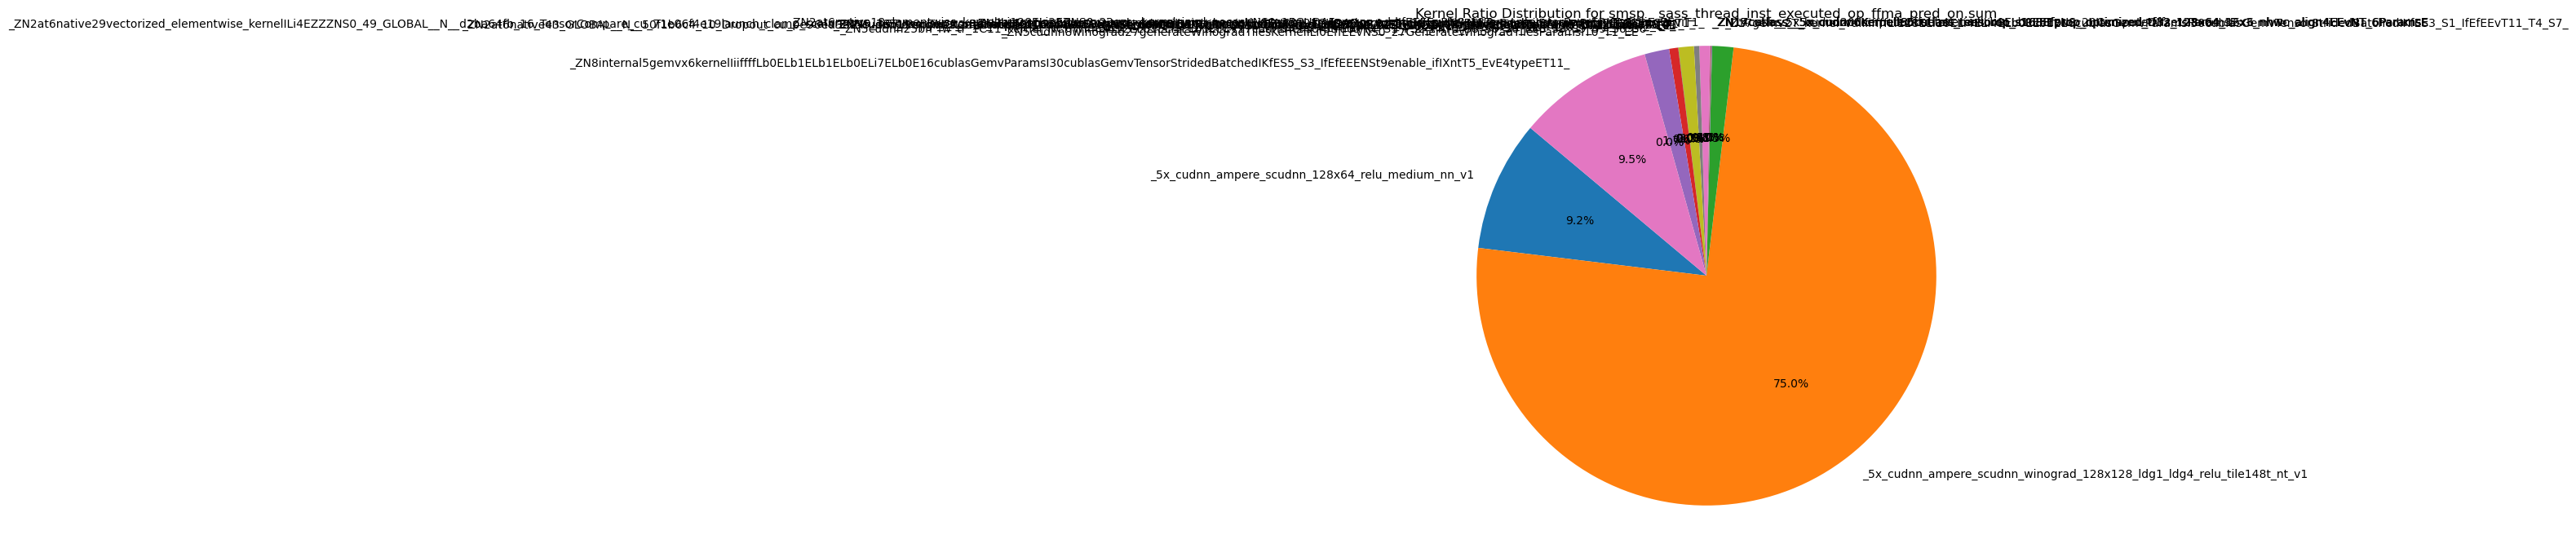

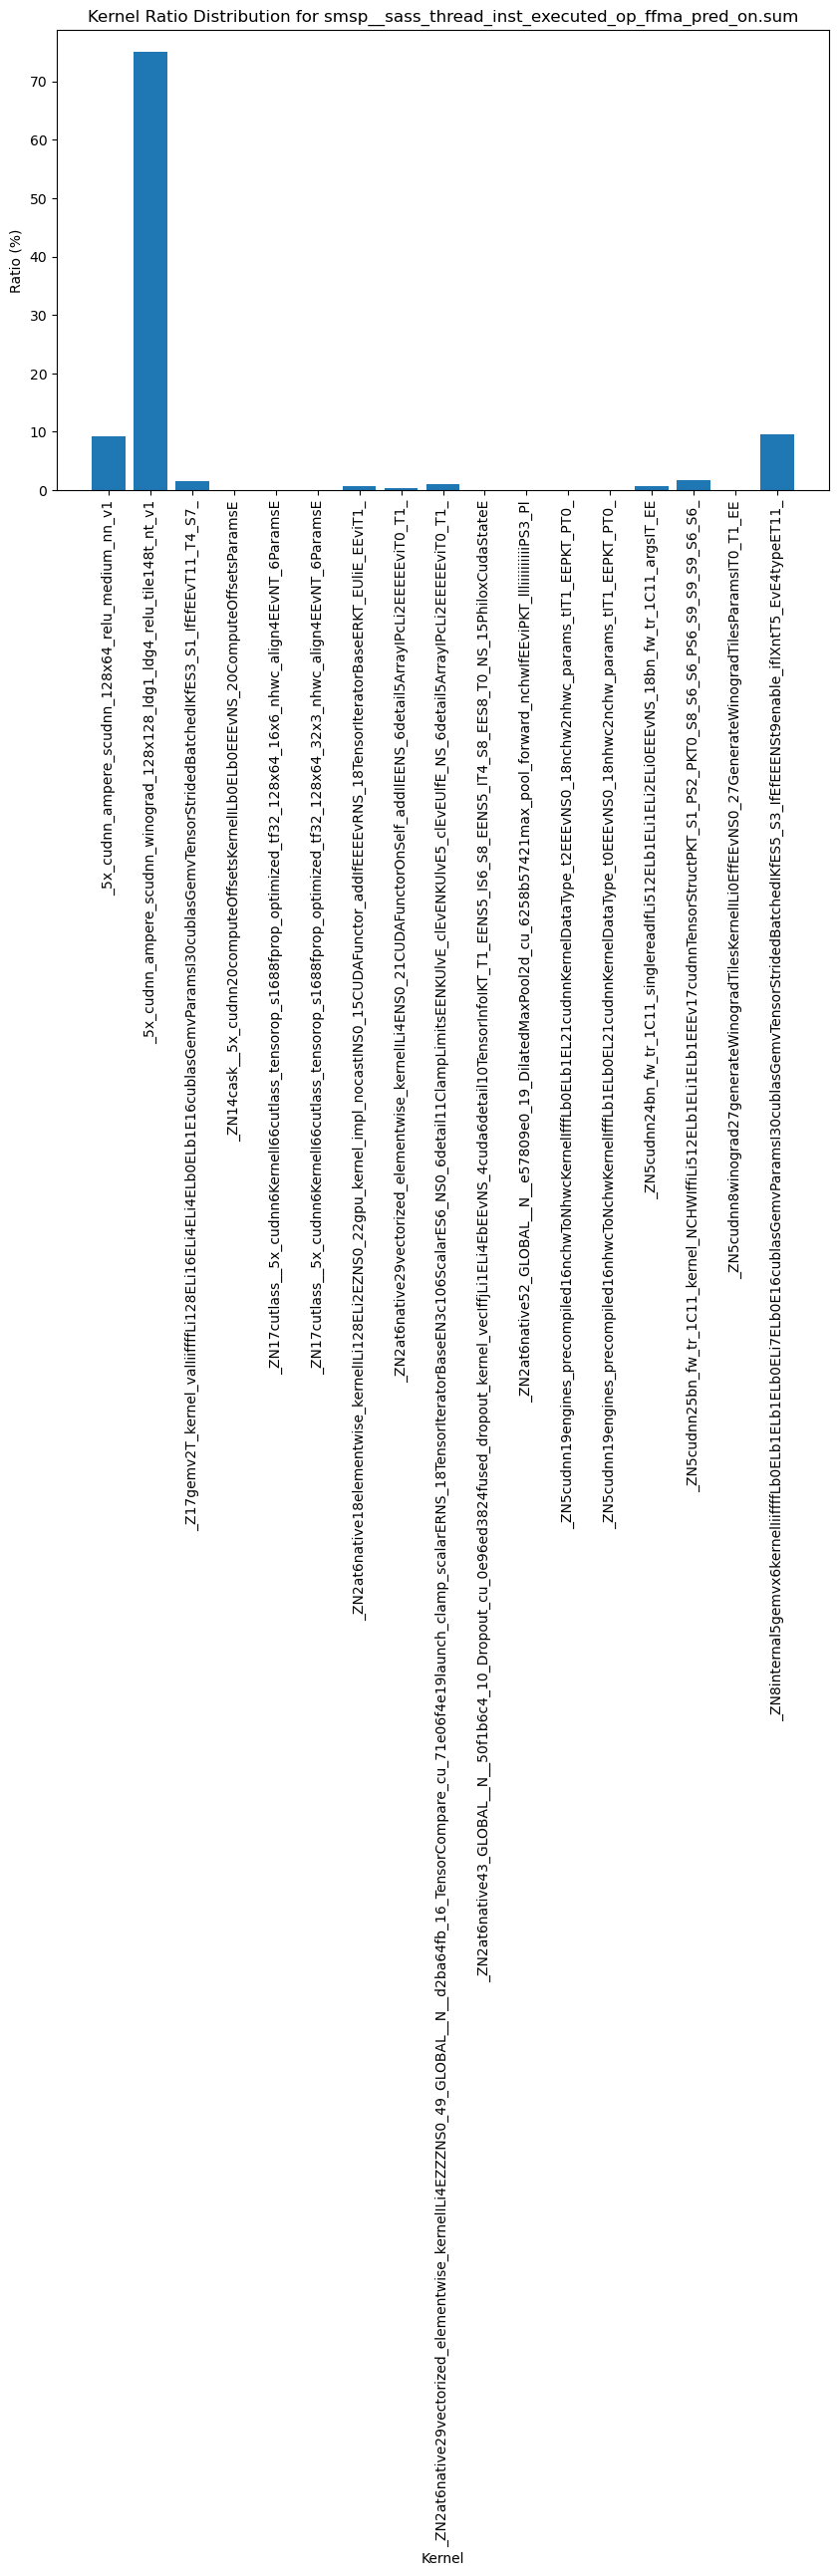

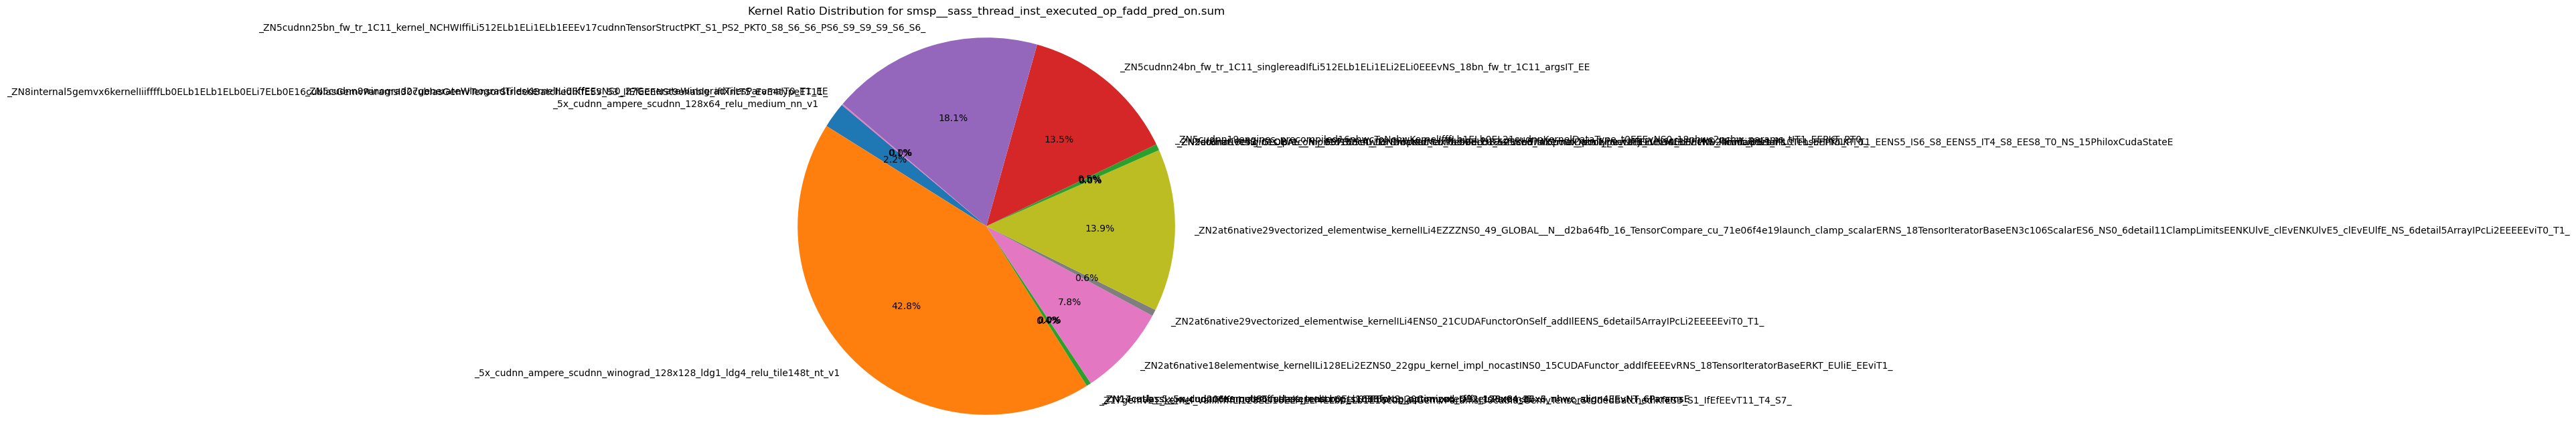

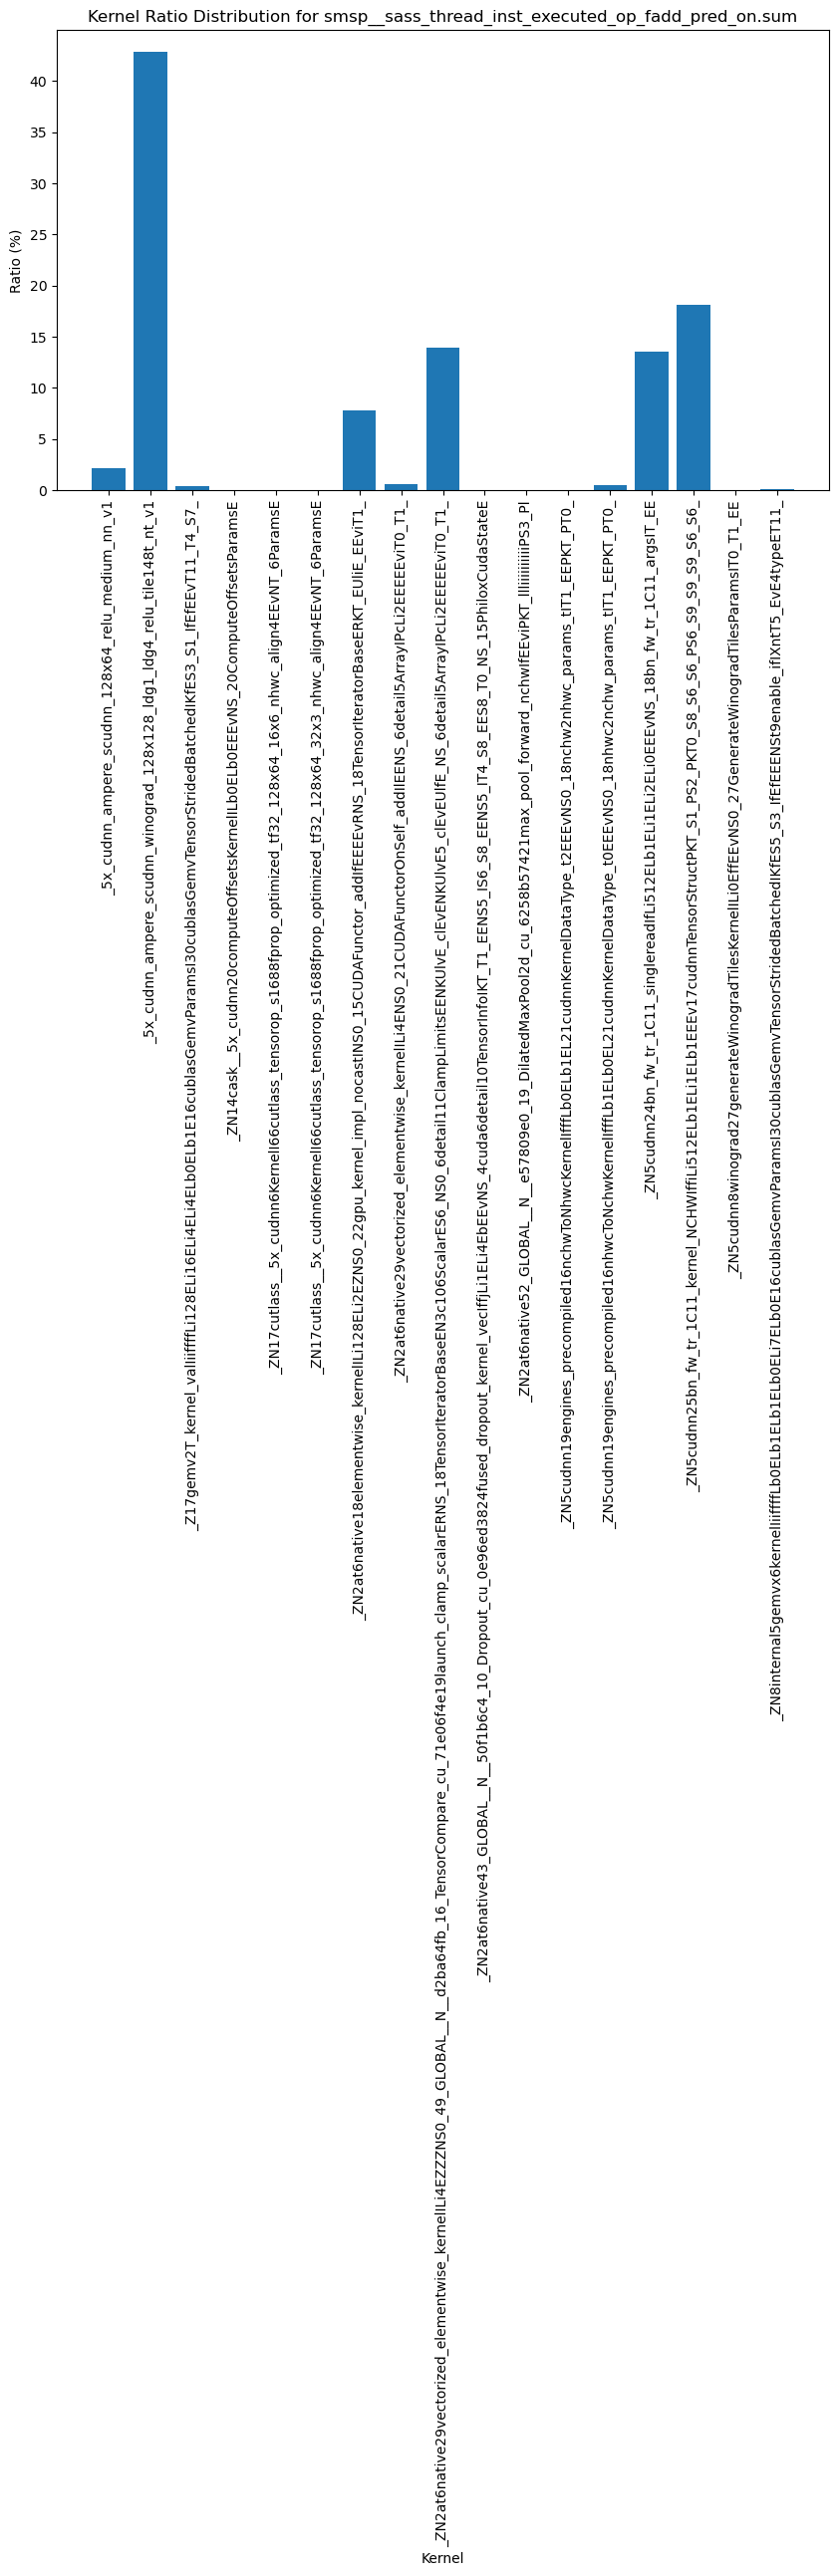

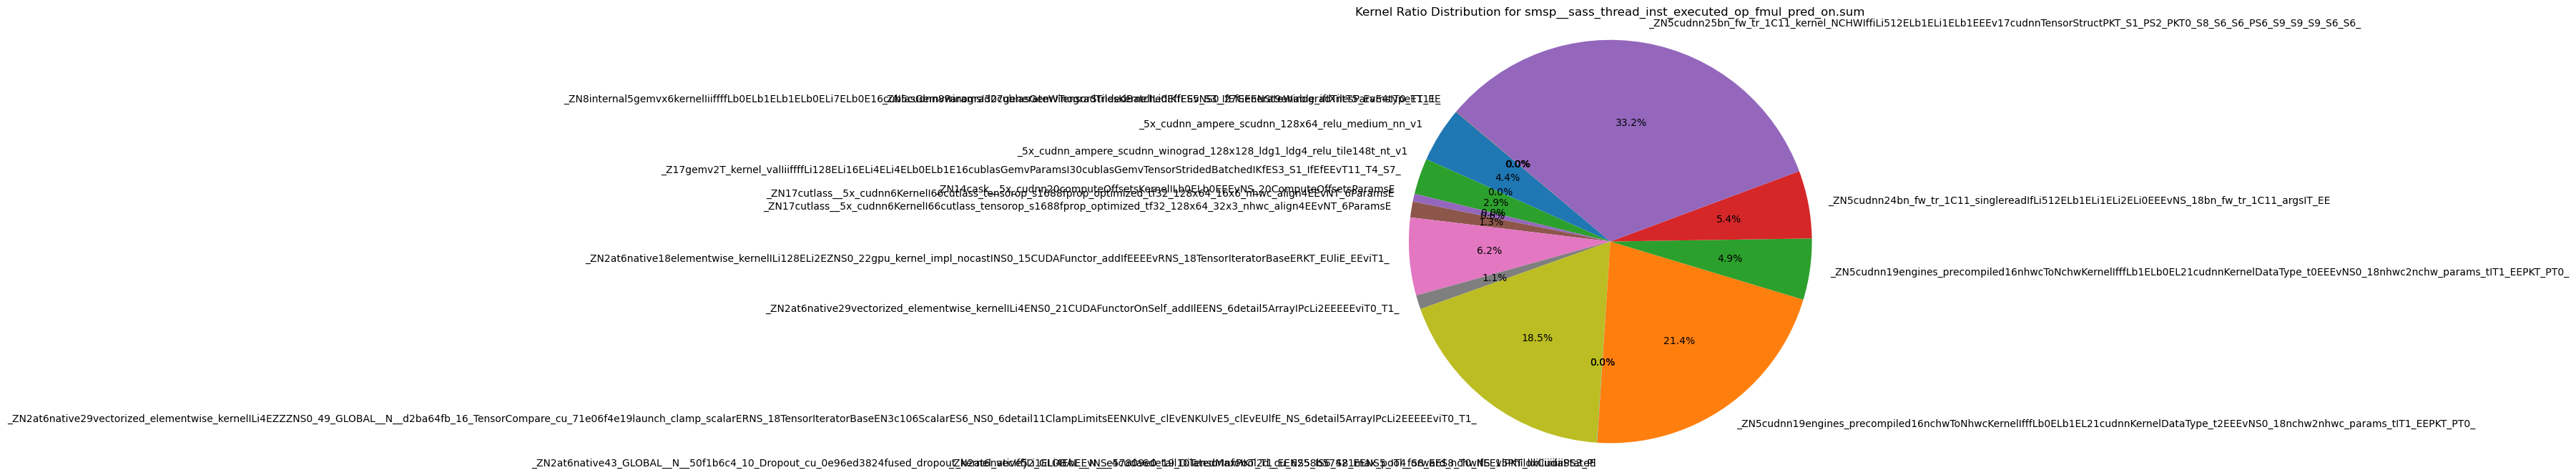

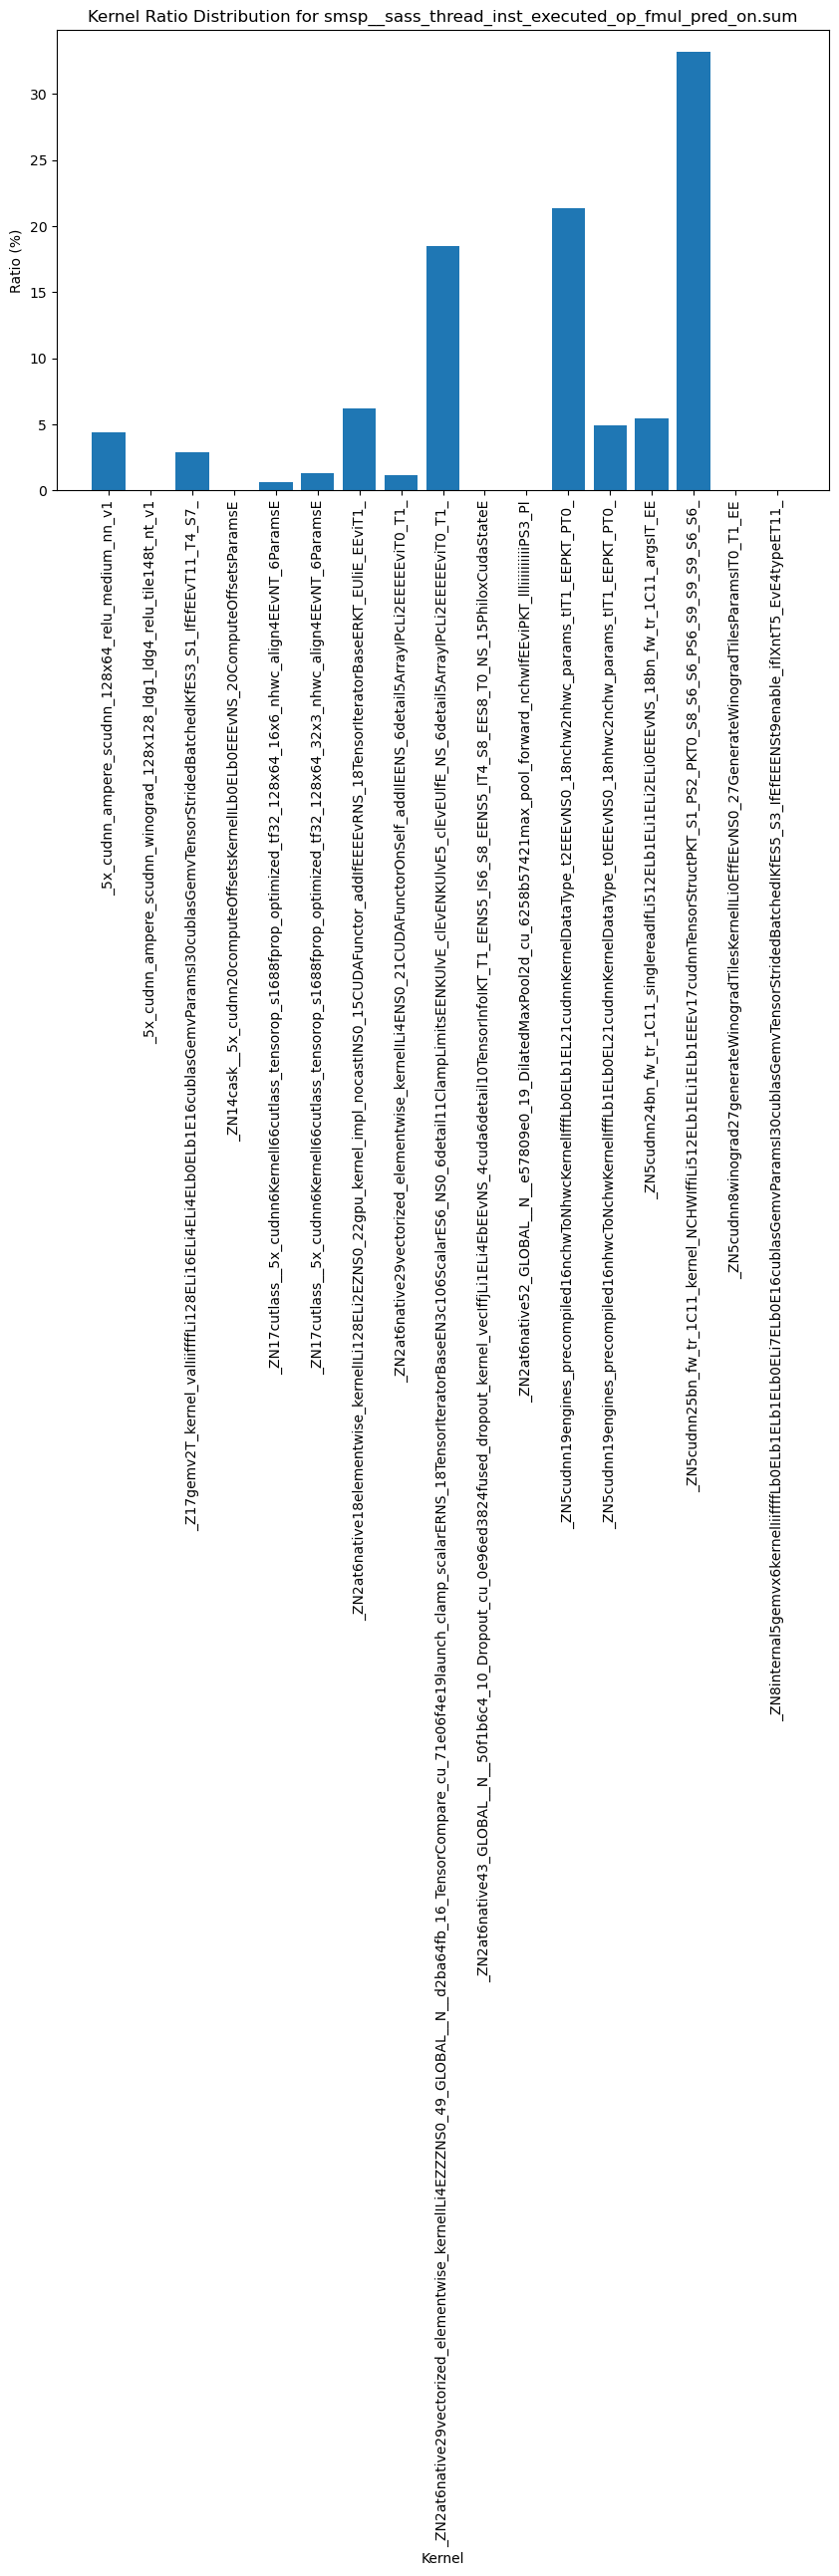

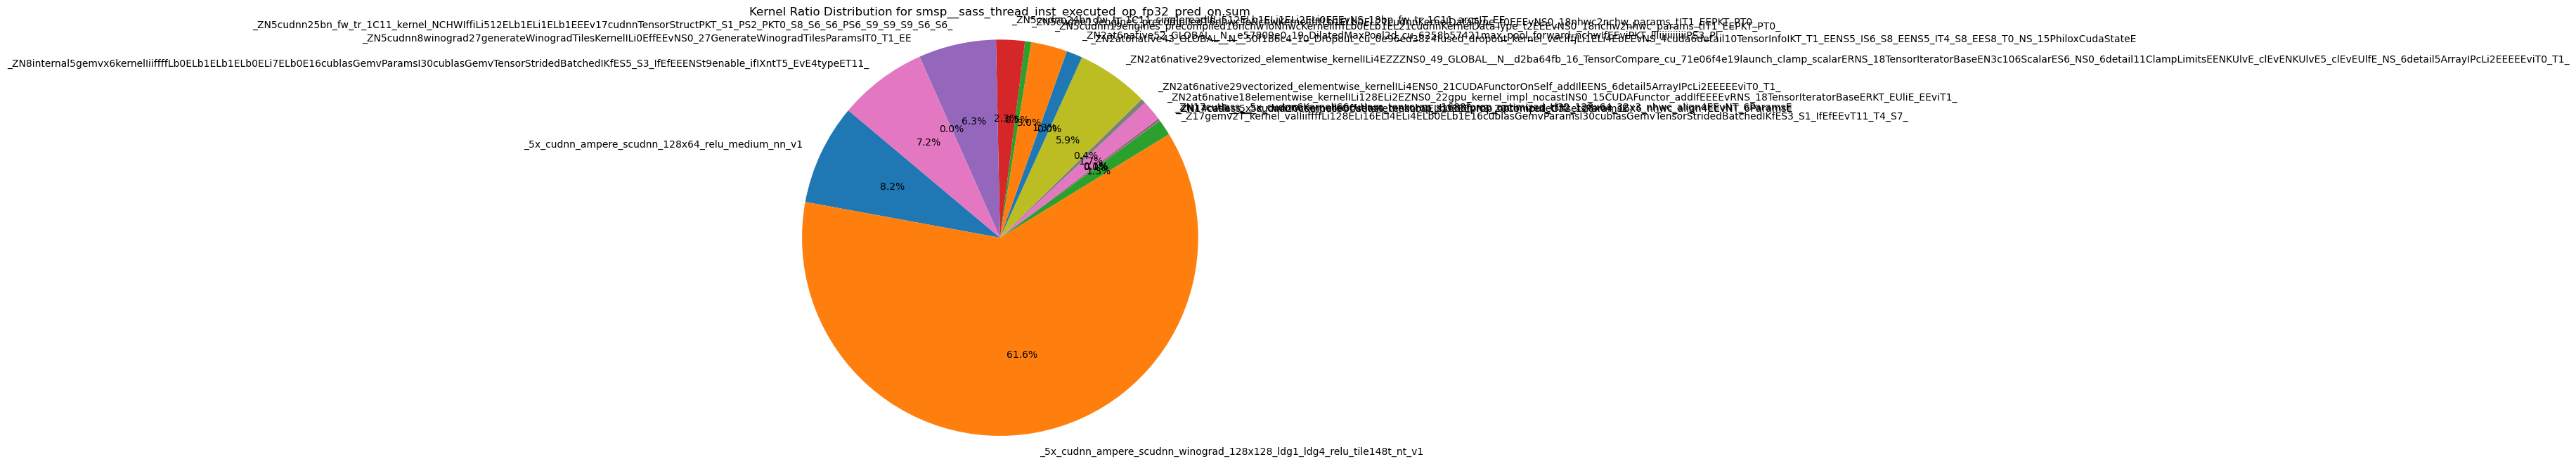

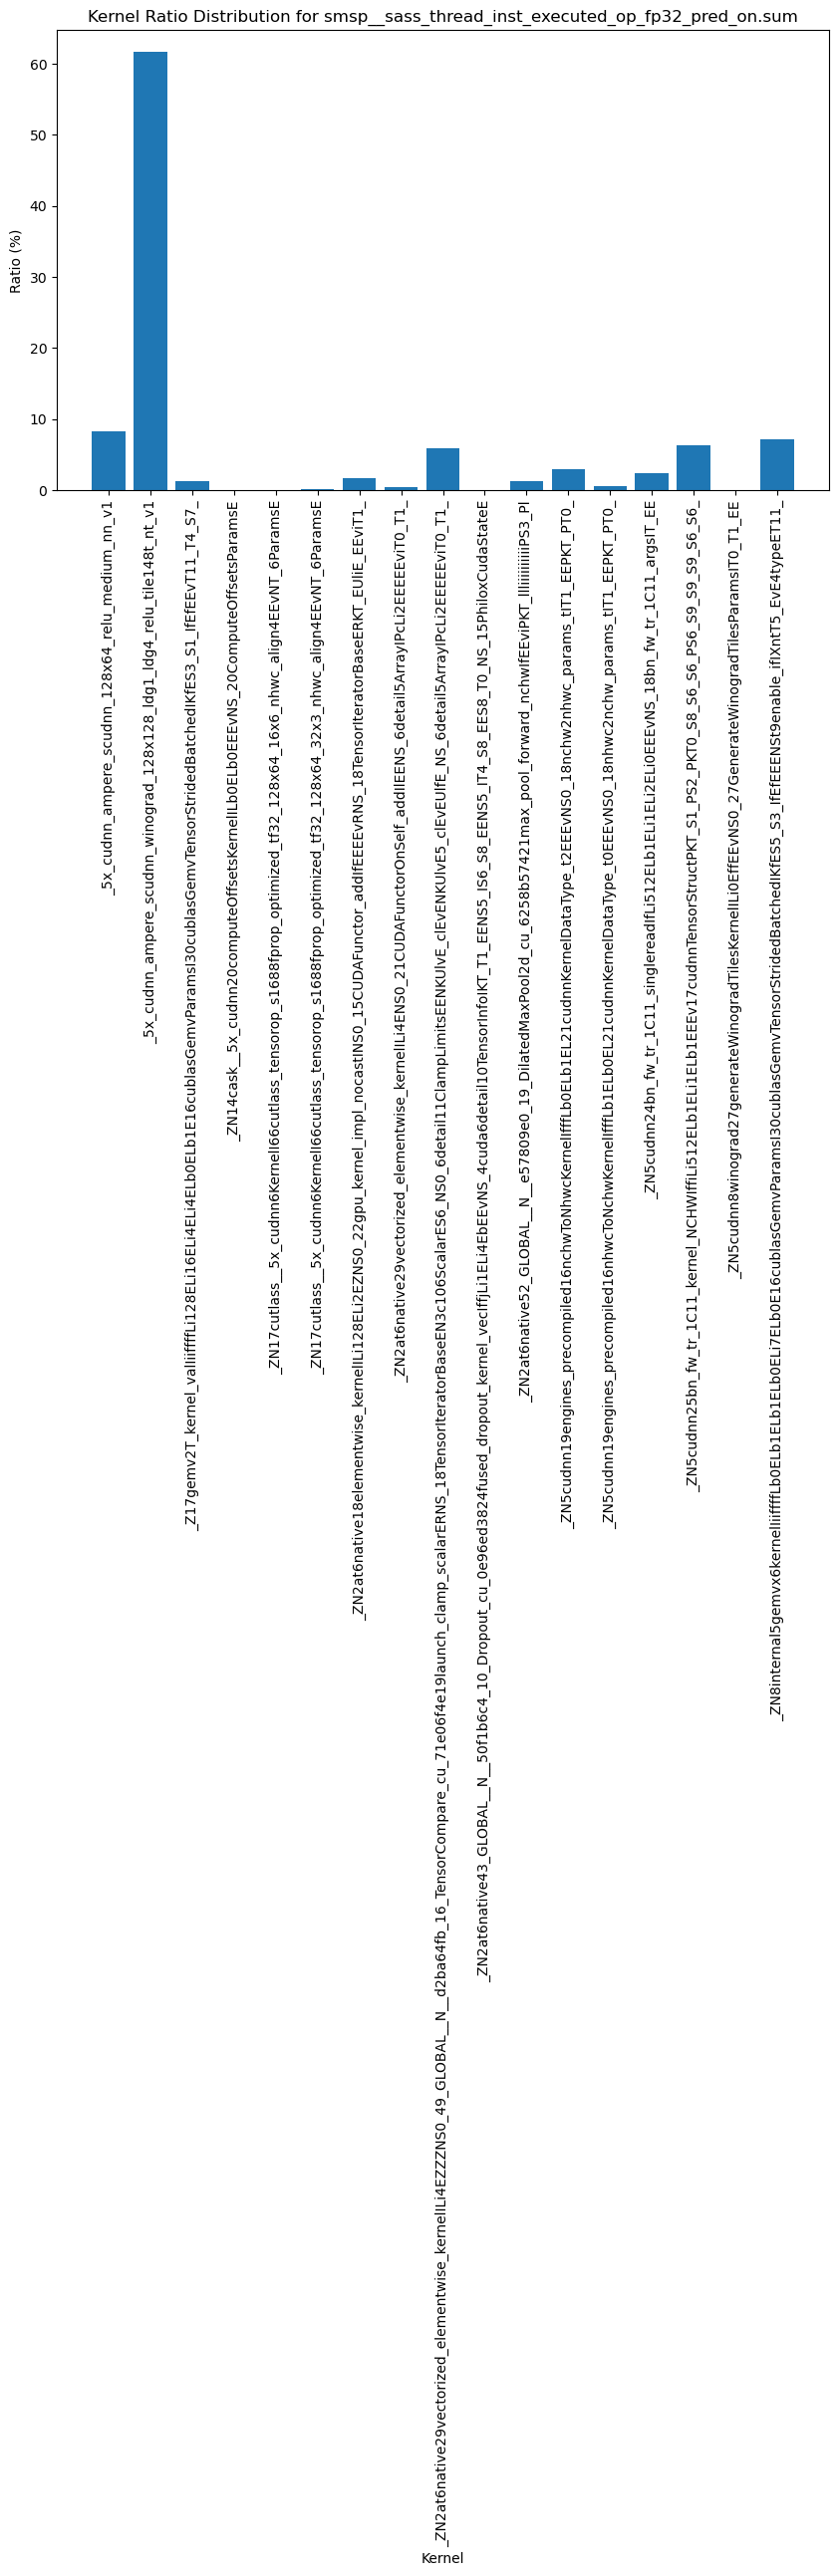

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# 读取CSV文件
df = pd.read_csv('metric_results_allsess.csv')

# 显示前几行数据以确认读取正确
print(df.head())

# 检查 'value' 列的数据类型
print(df['value'].dtype)

# 将 'value' 列转换为数值类型
df['value'] = pd.to_numeric(df['value'], errors='coerce')

# 定义要统计的 metric_names
metrics_to_sum = [
    'smsp__sass_thread_inst_executed_op_ffma_pred_on.sum',
    'smsp__sass_thread_inst_executed_op_fadd_pred_on.sum',
    'smsp__sass_thread_inst_executed_op_fmul_pred_on.sum',
    'smsp__sass_thread_inst_executed_op_fp32_pred_on.sum'
]

# 计算每个 metric_name 的 value 列的总和
results = {}
for metric in metrics_to_sum:
    filtered_df = df[df['metric_name'] == metric]
    total_sum = filtered_df['value'].sum()
    results[metric] = total_sum

# 打印每个 metric_name 的 value 列的总和
for metric, total_sum in results.items():
    print(f'Total sum of values for metric_name "{metric}": {total_sum}')

# 计算复合指标
composite_metric_value = (
    results['smsp__sass_thread_inst_executed_op_ffma_pred_on.sum'] * 2 +
    results['smsp__sass_thread_inst_executed_op_fadd_pred_on.sum'] +
    results['smsp__sass_thread_inst_executed_op_fmul_pred_on.sum']
)

# 打印复合指标的结果
print(f'Composite metric (2 * ffma + fadd + fmul): {composite_metric_value}')

# 创建 label 列
df['label'] = df.apply(lambda row: f"{row['session_id']},{row['range_id']},{row['kernel']}", axis=1)

# 指定保存图表的文件夹
output_folder = 'charts'
os.makedirs(output_folder, exist_ok=True)  # 创建文件夹（如果不存在）

# 绘制每种 metric_name 的饼图和柱状图
for metric in metrics_to_sum:
    # 过滤当前 metric_name 的数据
    filtered_df = df[df['metric_name'] == metric]
    
    # 计算每个 kernel 的 value 总和
    kernel_sums = filtered_df.groupby('kernel')['value'].sum().reset_index()
    
    # 计算每个 kernel 的 ratio
    kernel_sums['ratio'] = kernel_sums['value'] / results[metric] * 100
    
    # 提取 labels 和 ratios
    labels = kernel_sums['kernel']
    ratios = kernel_sums['ratio']
    
    # 绘制饼图
    plt.figure(figsize=(8, 8))
    plt.pie(ratios, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title(f'Kernel Ratio Distribution for {metric}')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    
    # 保存饼图到指定文件夹
    chart_path = os.path.join(output_folder, f'pie_{metric}.png')
    plt.savefig(chart_path)
    plt.show()
    
    # 绘制柱状图
    plt.figure(figsize=(10, 6))
    plt.bar(labels, ratios)
    plt.title(f'Kernel Ratio Distribution for {metric}')
    plt.xlabel('Kernel')
    plt.ylabel('Ratio (%)')
    plt.xticks(rotation=90)
    
    # 保存柱状图到指定文件夹
    bar_chart_path = os.path.join(output_folder, f'bar_{metric}.png')
    plt.savefig(bar_chart_path)
    plt.show()
